In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
training_dir = 'training'

TrainDataGenerator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range=0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode='nearest'
)

train_generator = TrainDataGenerator.flow_from_directory(training_dir, target_size=(100,100) , class_mode='binary')

Found 72 images belonging to 2 classes.


## Model Creation

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 , (3,3), activation=tf.nn.relu , input_shape = (100,100,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32 , (3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64 , (3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64 , (3,3), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 ,activation=tf.nn.relu ),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)   
])

model.compile(optimizer = 'adam' , metrics=['accuracy'] , loss='binary_crossentropy' )


## Validation Data

In [4]:
validation_dir = 'testing'

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir ,
    target_size=(100,100) ,
    class_mode='binary'
)

Found 30 images belonging to 2 classes.


## Fitting Model

In [5]:
history = model.fit(train_generator , epochs= 40 ,validation_data=validation_generator)

Epoch 1/40
3/3 [==============================] - 4s 555ms/step - loss: 3.2149 - accuracy: 0.3750 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/40
3/3 [==============================] - 1s 337ms/step - loss: 1.5007 - accuracy: 0.5417 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/40
3/3 [==============================] - 1s 492ms/step - loss: 2.4382 - accuracy: 0.4583 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 4/40
3/3 [==============================] - 1s 508ms/step - loss: 1.2137 - accuracy: 0.3750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/40
3/3 [==============================] - 1s 334ms/step - loss: 1.4609 - accuracy: 0.5278 - val_loss: 0.7166 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 1s 333ms/step - loss: 0.8917 - accuracy: 0.5972 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 7/40
3/3 [==============================] - 1s 511ms/step - loss: 1.0007 - accuracy: 0.5694 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 8/40
3/3 [====

## Plotting 

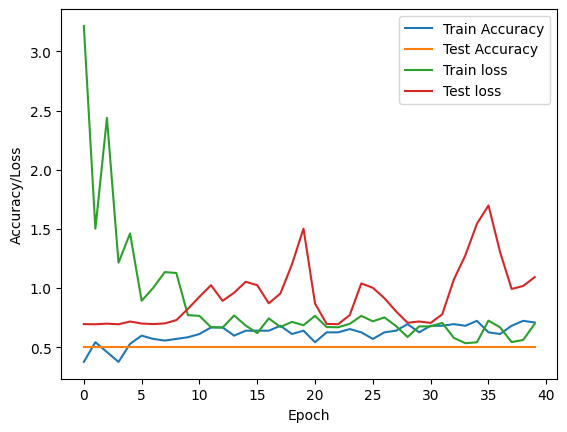

In [7]:
plt.plot(history.history['accuracy'] , label='Train Accuracy')
plt.plot(history.history['val_accuracy'] , label='Test Accuracy')

plt.plot(history.history['loss'] , label='Train loss')
plt.plot(history.history['val_loss'] , label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()